<a href="https://colab.research.google.com/github/celimo/LabEvolutivo_IA/blob/main/LabEvolu_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planteamiento del problema

En este caso se debe minimizar la función:

\begin{equation}
f(\vec{x})=9,78\cdot n + \sum_{i=1}^{n}\left[\left(x_i^2-A_i\cos{(2\pi\cdot x_i)}\right)\right]
\end{equation}

## Definición del cromosoma y de sus genes

En este caso el cromosoma va a estar definido por el vector:

\begin{equation}
V=\left(v_1, v_2, v_3, v_4, ..., v_n\right)
\end{equation}

Donde cada componente del vector es un componente de la entrada de la función, tal que:

\begin{align}
  x_1 &= v_1\\
  x_2 &= v_2\\
  x_3 &= v_3\\
  &\vdots\\
  x_n &= v_n
\end{align}


## Función de calidad

Ya que se desea minimizar la función se tiene que la suma de los cuadrados debe disminuir y la resta de los cosenos debe incrementar, de esta forma es correcto supone que el mínimo se produce cuando:

\begin{equation}
  \left( x_1^2+x_2^2+\cdots+x_n^2\right)\to 0
\end{equation}

\begin{equation}
  A_1\cos(2\pi\cdot x_1)+A_2\cos(2\pi\cdot x_2)+\cdots+A_n\cos(2\pi\cdot x_n)\to |A_1|+|A_2|+\cdots+|A_n|
\end{equation}

De esta forma, se puede considerar que se alcanza el mínimo cuando:

\begin{equation}
  F(\vec{x})=\frac{A_1\cos(2\pi\cdot x_1)+A_2\cos(2\pi\cdot x_2)+\cdots+A_n\cos(2\pi\cdot x_n)}{x_1^2+x_2^2+\cdots+x_n^2+1}=|A_1|+|A_2|+\cdots+|A_n|
\end{equation}

Note que en el denominador se debe sumar $1$ ya que conforme la suma de cuadrados tiende a cero se indefiniría la función si no estuviera el 1.

## Solución con 6 variables

Para este caso se tiene que el valor de $A$ es:

\begin{equation}
  A=(10{.}08, 10{.}17, 9{.}91, 9{.}74, 10{.}21, 9{.}82)
\end{equation}

### Definición del cromosoma

Como se expuso anteriormente el cromosoma está dado por:

\begin{equation}
V=\left(v_1, v_2, v_3, v_4, v_5, v_6\right)
\end{equation}

Donde cada componente del vector es un componente de la entrada de la función, tal que:

\begin{align}
  x_1 &= v_1 &
  x_2 &= v_2 &
  x_3 &= v_3 \\
  x_4 &= v_4 &
  x_5 &= v_5 &
  x_6 &= v_6
\end{align}

Ahora, se debe definir un rango de valores que puede tomar cada gen, los alelos, en este caso se espera que el resultado sea un número real pequeño, así que el rango definido es de $[-5, 5]$ para cada uno de los genes.

Ahora, por comodidad se va a definir que cada variable va a tener 4 posibles datos para combinar: $\{-5, -2{.}5, 2{.}5, 5\}$. Ya que se cuentan con 6 variables se tiene una población inicial de $4^6=4096$.


In [1]:
# Se importan las librerias a utilizar

import matplotlib.pyplot as plt # Graficar la evolución de la red
import numpy as np # Trabajar con matrices
import random # Para trabajar con valores aleatorios

In [2]:
# Se define la función de calidad
def functCalidad(X, A):
  T = X.T
  AT = A.T
  if len(T) != len(AT):
    return "Error"
  else:
    # Operación para obtener los resultados del numerador
    temp = AT*np.cos(2*np.pi*T)
    num = temp[0]
    # Se obtiene la suma de los numeradores
    for i in range(len(temp)-1):
      num += temp[i+1]

    # Se obtienen los valores elevado a la dos
    temp = T**2
    den = temp[0]
    for i in range(len(temp) - 1):
      den += temp[i+1]
    den += 1
    _resul = num/den

    return _resul

# Mejor solución posible (condición de parada)
def mejorValor(A):
  AT = A.T

  _resul = np.abs(AT[0])
  for i in range(len(AT) - 1):
    _resul += np.abs(AT[i+1])

  return _resul

# Se realiza la recombinación de los padres, se van a modificar 2 genes
def recombinacion(P, porcet):
  np.random.seed() # Crea una semilla para el random
  temp = np.random.permutation(P)
  final = int(len(P)*porcet)
  if final % 2 != 0:
    final -= 1
  padres = temp[:final]
  ind1 = random.randint(0, len(padres[0])-1)
  ind2 = random.randint(0, len(padres[0])-1)
  # Caso en que ambos sean iguales
  while ind1 == ind2:
    ind2 = random.randint(0, len(padres[0])-1)
  tempHijo = []
  for i in range(0, len(padres), 2):
    temp1 = []
    temp2 = []
    for j in range(len(padres[i])):
      if j != ind1 and j != ind2:
        temp1.append(padres[i][j])
        temp2.append(padres[i+1][j])
      else:
        temp1.append(padres[i+1][j])
        temp2.append(padres[i][j])
    tempHijo.append(temp1)
    tempHijo.append(temp2)
  hijos = np.array(tempHijo)
  return hijos

def torneo(X, calidad, porcentaje):
  # Se realizar el array para trabajar
  calidad = np.array([calidad])
  calidad = calidad.T

  temp = np.concatenate((X, calidad), axis=1)
  # Se define la cantidad de participantes
  # Note que es el doble de los padres utilizados
  final = int(2*len(P)*porcentaje)
  if final % 2 != 0:
    final -= 1
  # Se obtienen los participantes
  np.random.seed() # Crea una semilla para el random
  temp = np.random.permutation(temp)
  part = temp[:final]
  pob = []
  for i in range(0, len(part), 2):
    if part[i][6] > part[i+1][6]:
      pob.append(part[i][:6])
    elif part[i][6] > part[i+1][6]:
      pob.append(part[i+1][:6])
    else:
      if random.randint(0, 1) == 0:
        pob.append(part[i][:6])
      else:
        pob.append(part[i+1][:6])
  return np.array(pob)

# Función que se encarga de realizar la mutación de los hijos
def mutacion(X):
  # Se realiza una mutación del 10% de los datos
  final = int(len(X)*0.1)
  ind1 = random.randint(0, len(X[0])-1)
  ind2 = random.randint(0, len(X[0])-1)
  # Caso en que ambos sean iguales
  while ind1 == ind2:
    ind2 = random.randint(0, len(X[0])-1)
  
  # Se modifica el 10% de los hijos
  # como se generaron de forma aleatoria no hace falta modificar los hijos de
  # forma aleatoria
  for i in range(final):
    for j in range(len(X[i])):
      if j == ind1 or j == ind2:
        X[i][j] = np.random.normal(X[i][j], .5)
        if X[i][j] > 5:
          X[i][j] = 5
        elif X[i][j] < -5:
          X[i][j] = -5
  
  return X

# Obtener posibles soluciones digitadas por el usuario
def solucion(X, calidad, cant):
  sol = []
  calSol = []
  temp = X
  for i in range(cant):
    pos = np.where(calidad == np.max(calidad))
    sol.append(temp[pos[0][0]])
    calSol.append(calidad[pos[0][0]])
    temp = np.delete(temp, pos[0][0], axis=0)
    calidad = np.delete(calidad, pos[0][0], axis=0)
  
  return np.array(sol), np.array(calSol)

In [3]:
# Se crea la población inicial
array = [] # Va a contener toda la población

datos = [-5,-3, -1, -2.5, 2.5, 1, 3, 5]
A = np.array([[10.08, 10.17, 9.91, 9.74, 10.21, 9.82]])
dimension = 6

# Se carga el la población con todos lo cromosomas posibles
for i in range(len(datos)):
  for j in range(len(datos)):
    for k in range(len(datos)):
      for l in range(len(datos)):
        for m in range(len(datos)):
          for n in range(len(datos)):
              temp = []
              temp.append(datos[i]) # Posición 1
              temp.append(datos[j]) # Posición 2
              temp.append(datos[k]) # Posición 3
              temp.append(datos[l]) # Posición 4
              temp.append(datos[m]) # Posición 5
              temp.append(datos[n]) # Posición 6
              array.append(temp) # Se agrega el dato al arreglo

P = np.array(array) # Contiene toda la población

[[ 0.0069107  -0.0211133  -0.01360374  0.0021161  -0.01651968 -0.01380035]
 [-0.00932607 -0.0093611   0.00021186 -0.02593404 -0.00142427  0.01920694]
 [-0.00433122 -0.01309577 -0.02929218 -0.03004645  0.00694525  0.00550367]]
[59.63389376 59.62162148 59.41525224]
[0.49408684 0.51456452 0.858915  ]


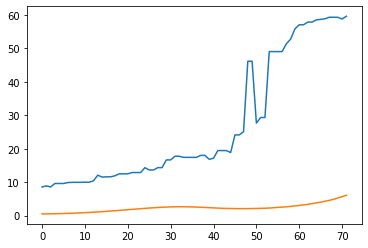

In [4]:
# Principio del ciclo de evolución
fin = mejorValor(A)

cantIter = 1000
porcentaje = 0.5

abs = []
graf = [[], [], []]

for i in range(cantIter):
  # Se evalua la calidad de la población
  calidad = functCalidad(P, A)
  abs.append(i)
  graf[0].append(np.max(calidad))
  graf[1].append(calidad.mean())
  graf[2].append(calidad.std())

  # Evaluar si se obtuvo el valor esperado
  if np.max(calidad) >= fin[0]*.99:
    # Se obtienen posibles soluciones
    # Para este caso 3
    sol, calSol = solucion(P, calidad, 3)
    # Se termina la evolución
    break
  elif i == cantIter - 1:
    # Se obtienen posibles soluciones
    # Para este caso 3
    sol, calSol = solucion(P, calidad, 3)

  # Seleccionar los cromosomas que van a ser padres
  # Se va a seleccionar el 50% de la población como padres
  # Se obtienen ls nuevos hijos
  hijos = recombinacion(P, porcentaje)

  # Se realiza la mutación de los hijos
  hijos = mutacion(hijos)

  # Se realiza el torneo
  newP = torneo(P, calidad, porcentaje)
  
  # Se obtiene la nueva población
  P = np.concatenate((newP, hijos), axis=0)

error = ((fin[0] - calSol)/fin[0])*100
print(sol)
print(calSol)
print(error)
plt.plot(abs, graf[0])
plt.plot(abs, graf[2])
plt.show()